In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics

In [47]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [3]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
X.shape, y.shape

((207049, 19), (207049,))

In [6]:
X_mid, X_test, y_mid, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify = y)

In [7]:
X_mid.shape, y_mid.shape, X_test.shape, y_test.shape

((165639, 19), (165639,), (41410, 19), (41410,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((124229, 19), (124229,), (41410, 19), (41410,))

In [10]:
# running the training data through all the winning models, paying attention to maximizing AUC and minimizing False Positive

### Logistic Regression ###

In [11]:
logistic = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
logistic_pred = logistic.predict(X_val)

In [14]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[11338  7648]
 [ 5026 17398]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.78      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.69      0.69     41410
weighted avg       0.69      0.69      0.69     41410



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic score: 0.693939


In [15]:
logistic_y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, logistic_y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.758307201235347


In [17]:
logistic_pred_test = logistic.predict(X_test)

In [18]:
print('Logistic Results:')
print(confusion_matrix(y_test,logistic_pred_test))
print(classification_report(y_test, logistic_pred_test))

Logistic Results:
[[11241  7745]
 [ 5081 17343]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64     18986
           1       0.69      0.77      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.68      0.68     41410
weighted avg       0.69      0.69      0.69     41410



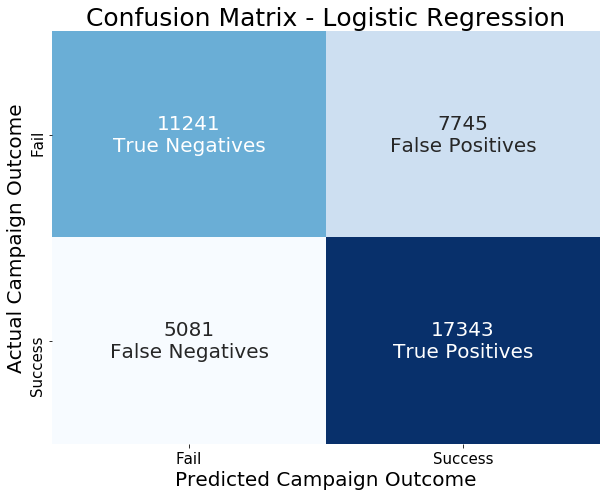

In [48]:
cm = confusion_matrix(y_test,logistic_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Logistic Regression', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.savefig('Confusion_matrix_Logistic.png')
plt.savefig('Confusion_matrix_Logistic.svg')
plt.show()

In [19]:
logistic_y_score_test = logistic.predict_proba(X_test)[:, 1]
logistic_fpr_test, logistic_tpr_test, logistic_auc_thresholds = roc_curve(y_test, logistic_y_score_test)
roc_auc_logistic_test = auc(logistic_fpr_test, logistic_tpr_test)
print(auc(logistic_fpr_test, logistic_tpr_test))

0.7557548905949778


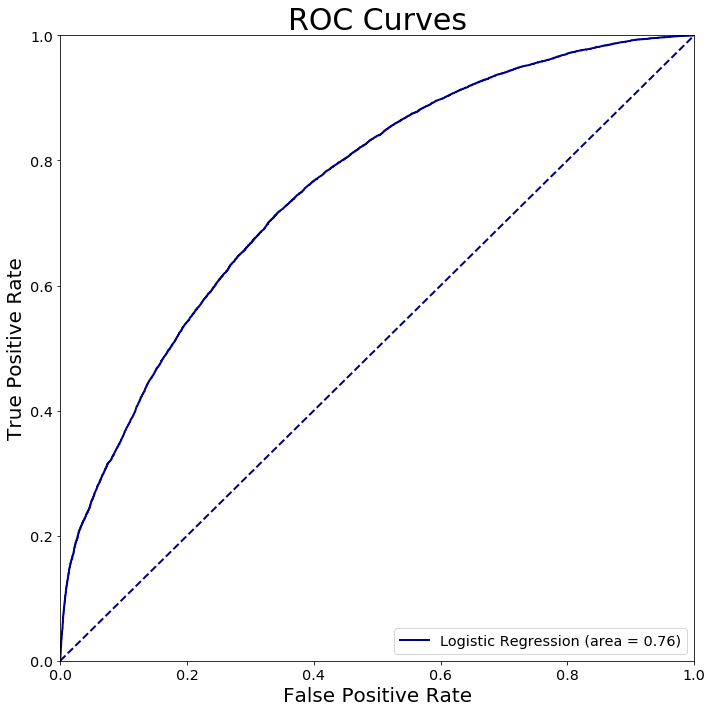

In [60]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='darkblue',
         lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Bernoulli Naive Bayes ###

In [51]:
bernoulli = naive_bayes.BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [52]:
bernoulli.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [53]:
bernoulli_pred = bernoulli.predict(X_val)

In [54]:
print('Bernoulli Results:')
print(confusion_matrix(y_val,bernoulli_pred))
print(classification_report(y_val, bernoulli_pred))
print('Bernoulli score: %f' % bernoulli.fit(X_train, y_train).score(X_val, y_val))

Bernoulli Results:
[[10359  8627]
 [ 4491 17933]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61     18986
           1       0.68      0.80      0.73     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.69      0.67      0.67     41410
weighted avg       0.69      0.68      0.68     41410

Bernoulli score: 0.683217


In [55]:
bernoulli_y_score = bernoulli.predict_proba(X_val)[:, 1]
bernoulli_fpr, bernoulli_tpr, auc_thresholds = roc_curve(y_val, bernoulli_y_score)
roc_auc_bernoulli = auc(bernoulli_fpr, bernoulli_tpr)
print(auc(bernoulli_fpr, bernoulli_tpr))

0.7456059063499068


In [56]:
bernoulli_pred_test = bernoulli.predict(X_test)

In [57]:
print('Bernoulli Results:')
print(confusion_matrix(y_test,bernoulli_pred_test))
print(classification_report(y_test, bernoulli_pred_test))

Bernoulli Results:
[[10243  8743]
 [ 4438 17986]]
              precision    recall  f1-score   support

           0       0.70      0.54      0.61     18986
           1       0.67      0.80      0.73     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.69      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410



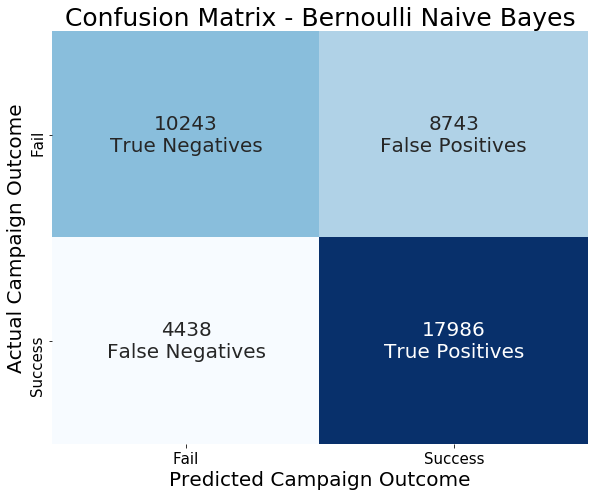

In [58]:
cm = confusion_matrix(y_test,bernoulli_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Bernoulli Naive Bayes', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.savefig('Confusion_matrix_Bernoulli.png')
plt.savefig('Confusion_matrix_Bernoulli.svg')
plt.show()

In [59]:
bernoulli_y_score_test = bernoulli.predict_proba(X_test)[:, 1]
bernoulli_fpr_test, bernoulli_tpr_test, bernoulli_auc_thresholds = roc_curve(y_test, bernoulli_y_score_test)
roc_auc_bernoulli_test = auc(bernoulli_fpr_test, bernoulli_tpr_test)
print(auc(bernoulli_fpr_test, bernoulli_tpr_test))

0.7431611455709952


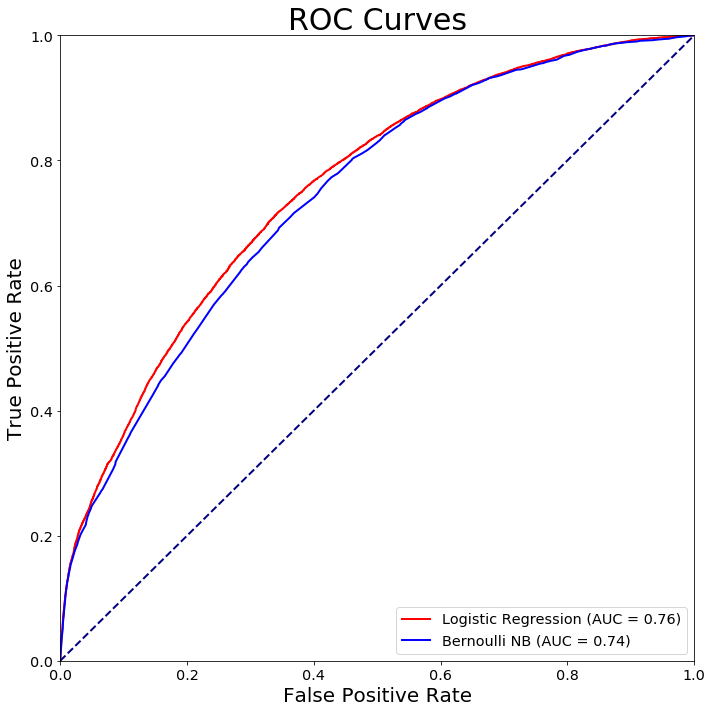

In [62]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Random Forest ###

In [63]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
forest_pred = forest.predict(X_val)

In [67]:
print('Forest Results:')
print(confusion_matrix(y_val, forest_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))

Forest Results:
[[11819  7167]
 [ 6225 16199]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64     18986
           1       0.69      0.72      0.71     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.67      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410

Forest score: 0.675875


In [68]:
forest_y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, forest_y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

0.7342914100684211


In [69]:
forest_pred_test = forest.predict(X_test)

In [70]:
print('Random Forest Results:')
print(confusion_matrix(y_test,forest_pred_test))
print(classification_report(y_test, forest_pred_test))

Random Forest Results:
[[11886  7100]
 [ 6249 16175]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.64     18986
           1       0.69      0.72      0.71     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.68      0.67      0.67     41410
weighted avg       0.68      0.68      0.68     41410



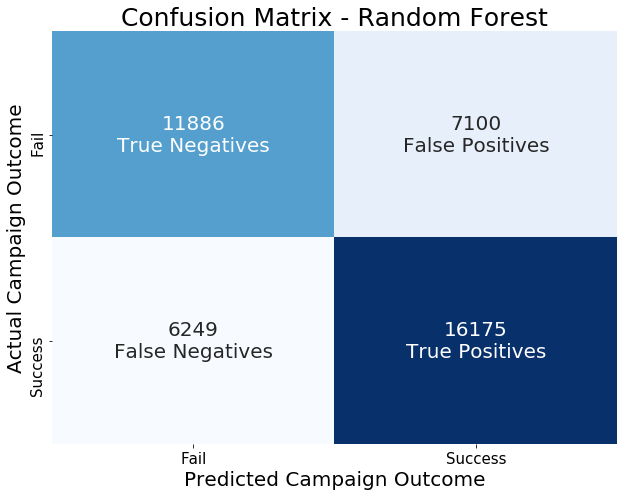

In [71]:
cm = confusion_matrix(y_test,forest_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - Random Forest', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.savefig('Confusion_matrix_Forest.png')
plt.savefig('Confusion_matrix_Forest.svg')
plt.show()

In [72]:
forest_y_score_test = forest.predict_proba(X_test)[:, 1]
forest_fpr_test, forest_tpr_test, forest_auc_thresholds = roc_curve(y_test, forest_y_score_test)
roc_auc_forest_test = auc(forest_fpr_test, forest_tpr_test)
print(auc(forest_fpr_test, forest_tpr_test))

0.7378249568499297


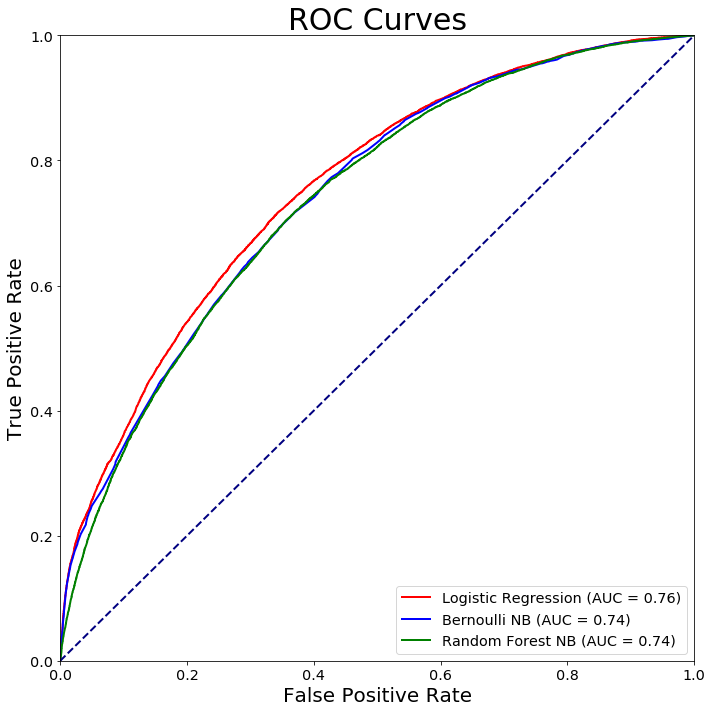

In [73]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot(forest_fpr_test, forest_tpr_test, color='green',
         lw=lw, label='Random Forest NB (AUC = %0.2f)' % roc_auc_forest_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title('ROC Curves', size = 30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### XGBoost ###

In [75]:
xgBoost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=7, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [76]:
xgBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=7, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
xgBoost_pred = xgBoost.predict(X_val)

In [78]:
print('XGBoost Results:')
print(confusion_matrix(y_val, xgBoost_pred))
print(classification_report(y_val, xgBoost_pred))
print('XGBoost score: %f' % xgBoost.fit(X_train, y_train).score(X_val, y_val))

XGBoost Results:
[[12051  6935]
 [ 4623 17801]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.68     18986
           1       0.72      0.79      0.75     22424

   micro avg       0.72      0.72      0.72     41410
   macro avg       0.72      0.71      0.72     41410
weighted avg       0.72      0.72      0.72     41410

XGBoost score: 0.720889


In [79]:
xgBoost_y_score = xgBoost.predict_proba(X_val)[:, 1]

In [80]:
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_val, xgBoost_y_score)
roc_auc_xgBoost = auc(xgBoost_fpr, xgBoost_tpr)
print(auc(xgBoost_fpr, xgBoost_tpr))

0.7912842668982786


In [81]:
xgBoost_pred_test = xgBoost.predict(X_test)

In [115]:
xgBoost.predict([-0.03639885, -0.37481072, -0.24414886, -0.04240935,  0.56599264,
       -0.21773993, -0.15281895, -0.10589387, -0.17668643, -0.26982191,
       -0.40234887, -0.29229358, -0.25988079, -0.1363122 , -0.4128152 ,
       -0.17738287, -0.30923274, -0.36534622,  5.3262231 ])

array([1])

In [118]:
print('XGBoost Results:')
print(confusion_matrix(y_test,xgBoost_pred_test))
print(classification_report(y_test, xgBoost_pred_test))

XGBoost Results:
[[12019  6967]
 [ 4651 17773]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67     18986
           1       0.72      0.79      0.75     22424

   micro avg       0.72      0.72      0.72     41410
   macro avg       0.72      0.71      0.71     41410
weighted avg       0.72      0.72      0.72     41410



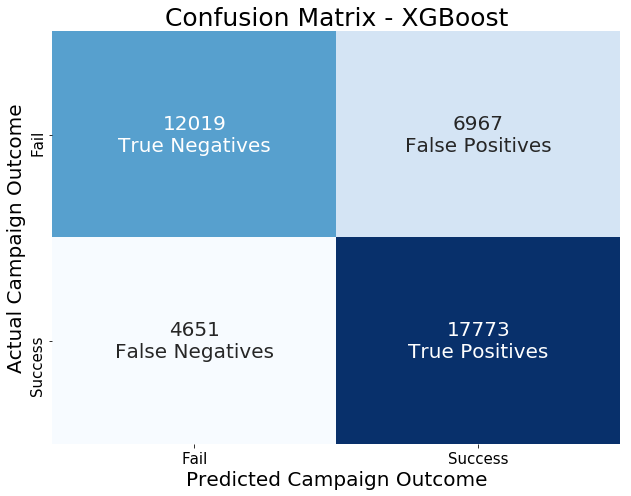

In [119]:
cm = confusion_matrix(y_test,xgBoost_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - XGBoost', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.savefig('Confusion_matrix_XGBoost.png')
plt.savefig('Confusion_matrix_XGBoost.svg')
plt.show()

In [120]:
xgBoost_y_score_test = xgBoost.predict_proba(X_test)[:, 1]
xgBoost_fpr_test, xgBoost_tpr_test, xgBoost_auc_thresholds = roc_curve(y_test, xgBoost_y_score_test)
roc_auc_xgBoost_test = auc(xgBoost_fpr_test, xgBoost_tpr_test)
print(auc(xgBoost_fpr_test, xgBoost_tpr_test))

0.7895514054725867


### Optimizing for Precision Experiment with XGBoost - Did not result in an improvement of the outcome ###

In [121]:
y_probs = xgBoost.predict_proba(X_test)[:, 1]
precisions = []
thresholds = []
for t in range(0,100,5):
    y_pred = pd.Series(y_probs).apply(lambda x: 0 if x<(t/100) else 1)
    precisions.append(metrics.precision_score(y_test, y_pred))
    thresholds.append(t/100)

In [122]:
np.argmax(np.array(precisions))

19

In [123]:
thresholds[19]

0.95

In [124]:
max(precisions)

0.958904109589041

In [125]:
y_pred_precise = pd.Series(y_probs).apply(lambda x: 0 if x<(95/100) else 1)

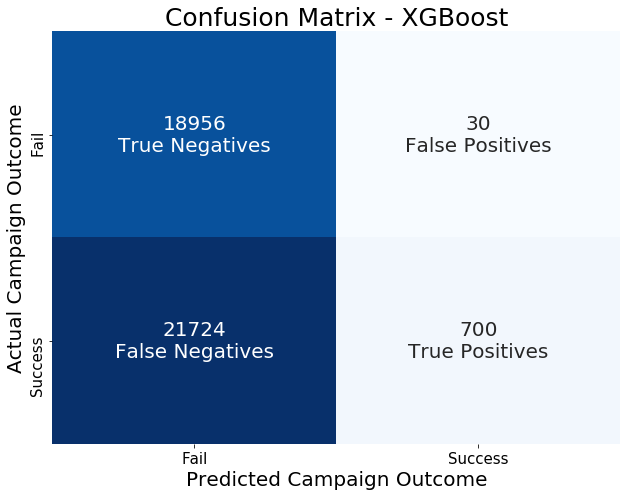

In [126]:
cm = confusion_matrix(y_test,y_pred_precise)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - XGBoost', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.show()

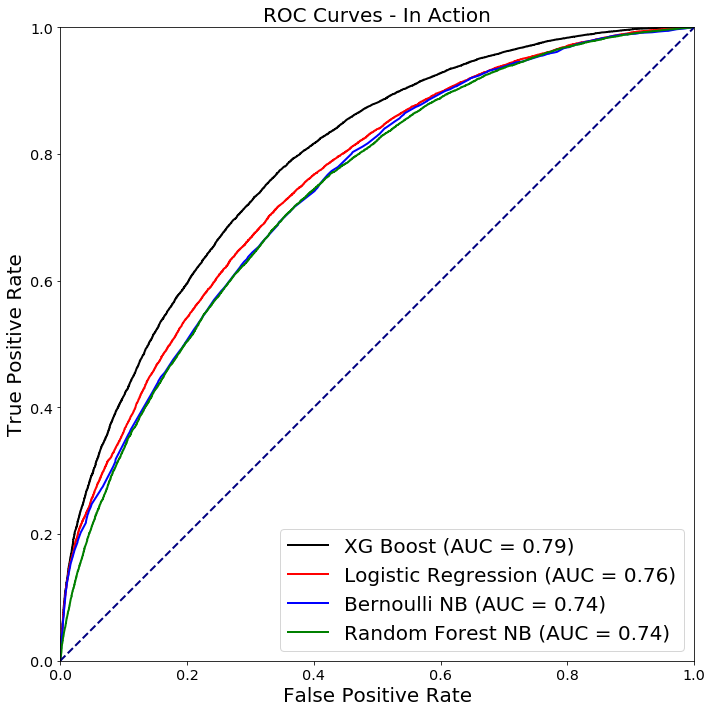

In [102]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(xgBoost_fpr_test, xgBoost_tpr_test, color='black',
         lw=lw, label='XG Boost (AUC = %0.2f)' % roc_auc_xgBoost_test)
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot(forest_fpr_test, forest_tpr_test, color='green',
         lw=lw, label='Random Forest NB (AUC = %0.2f)' % roc_auc_forest_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves - In Action', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
#plt.savefig('roc_curves_test_all_but_svm.png')
#plt.savefig('roc_curves_test_all_but_svm_svg.svg')
plt.show()

### SVM ###

In [127]:
SVC = SVC(C=10, cache_size=4000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
SVC.fit(X_train, y_train)

In [ ]:
SVC_pred = SVC.predict(X_val)

In [ ]:
print('SVC Results:')
print(confusion_matrix(y_val, SVC_pred))
print(classification_report(y_val, SVC_pred))
print('SVC score: %f' % SVC.fit(X_train, y_train).score(X_val, y_val))

In [41]:
SVC_y_score = SVC.predict_proba(X_val)[:, 1]

In [42]:
SVC_fpr, SVC_tpr, auc_thresholds = roc_curve(y_val, SVC_y_score)
roc_auc_SVC = auc(SVC_fpr, SVC_tpr)
print(auc(SVC_fpr, SVC_tpr))

0.752711697052326


In [ ]:
SVC_pred_test = SVC.predict(X_test)

In [ ]:
print('SVC Results:')
print(confusion_matrix(y_test,SVC_pred_test))
print(classification_report(y_test, SVC_pred_test))

In [ ]:
cm = confusion_matrix(y_test,SVC_pred_test)
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 20}, fmt='g')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
    t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix - SVM', size=25)
plt.xlabel('Predicted Campaign Outcome', size=20)
plt.ylabel('Actual Campaign Outcome', size=20)
labels = ['Fail', 'Success']
ax.set_xticklabels(labels, size = 15)
ax.set_yticklabels(labels, size = 15)
plt.tight_layout()
plt.savefig('Confusion_matrix_SVM.png')
plt.savefig('Confusion_matrix_SVM.svg')
plt.show()

In [ ]:
SVC_y_score_test = SVC.predict_proba(X_test)[:, 1]
SVC_fpr_test, SVC_tpr_test, SVC_auc_thresholds = roc_curve(y_test, SVC_y_score_test)
roc_auc_SVC_test = auc(SVC_fpr_test, SVC_tpr_test)
print(auc(SVC_fpr_test, SVC_tpr_test))

In [ ]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(xgBoost_fpr_test, xgBoost_tpr_test, color='black',
         lw=lw, label='XG Boost (AUC = %0.2f)' % roc_auc_xgBoost_test)
plt.plot(logistic_fpr_test, logistic_tpr_test, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic_test)
plt.plot(SVC_fpr_test, SVC_tpr_test, color='orange',
         lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVC_test)
plt.plot(bernoulli_fpr_test, bernoulli_tpr_test, color='blue',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli_test)
plt.plot(forest_fpr_test, forest_tpr_test, color='green',
         lw=lw, label='Random Forest NB (AUC = %0.2f)' % roc_auc_forest_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves - In Action', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
plt.savefig('roc_curves_test_all_with_svm.png')
plt.savefig('roc_curves_test_all_with_svm_svg.svg')
plt.show()